In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
# 1. Fetch S&P 500 Data (Ticker: ^GSPC)
# We will look at the last 5 years of data
ticker = '^GSPC'
data = yf.download(ticker, start='2019-01-01', end='2024-01-01', progress=False)



C:\Users\yahya\AppData\Local\Temp\ipykernel_17312\3810290532.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-01-01', progress=False)


In [13]:
data

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2019-01-02,2510.030029,2519.489990,2467.469971,2476.959961,3733160000
2019-01-03,2447.889893,2493.139893,2443.959961,2491.919922,3858830000
2019-01-04,2531.939941,2538.070068,2474.330078,2474.330078,4234140000
2019-01-07,2549.689941,2566.159912,2524.560059,2535.610107,4133120000
2019-01-08,2574.409912,2579.820068,2547.560059,2568.110107,4120060000
...,...,...,...,...,...
2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000


In [25]:
# Keep only the Adjusted Close price
df = data[['Close']].copy()

# 2. Calculate Logarithmic Returns
# Formula: ln(Pt / Pt-1)
df['Return'] = (df['Close'] / df['Close'].shift(1))
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

In [26]:
df.head()

Price,Close,Return,Log_Return
Ticker,^GSPC,,
Date,,,
2019-01-02,2510.030029,NaN,NaN
2019-01-03,2447.889893,0.975243,-0.025068
2019-01-04,2531.939941,1.034336,0.033759
2019-01-07,2549.689941,1.007010,0.006986
2019-01-08,2574.409912,1.009695,0.009649


In [27]:
# Drop the first NaN value created by the shift
df.dropna(inplace=True)

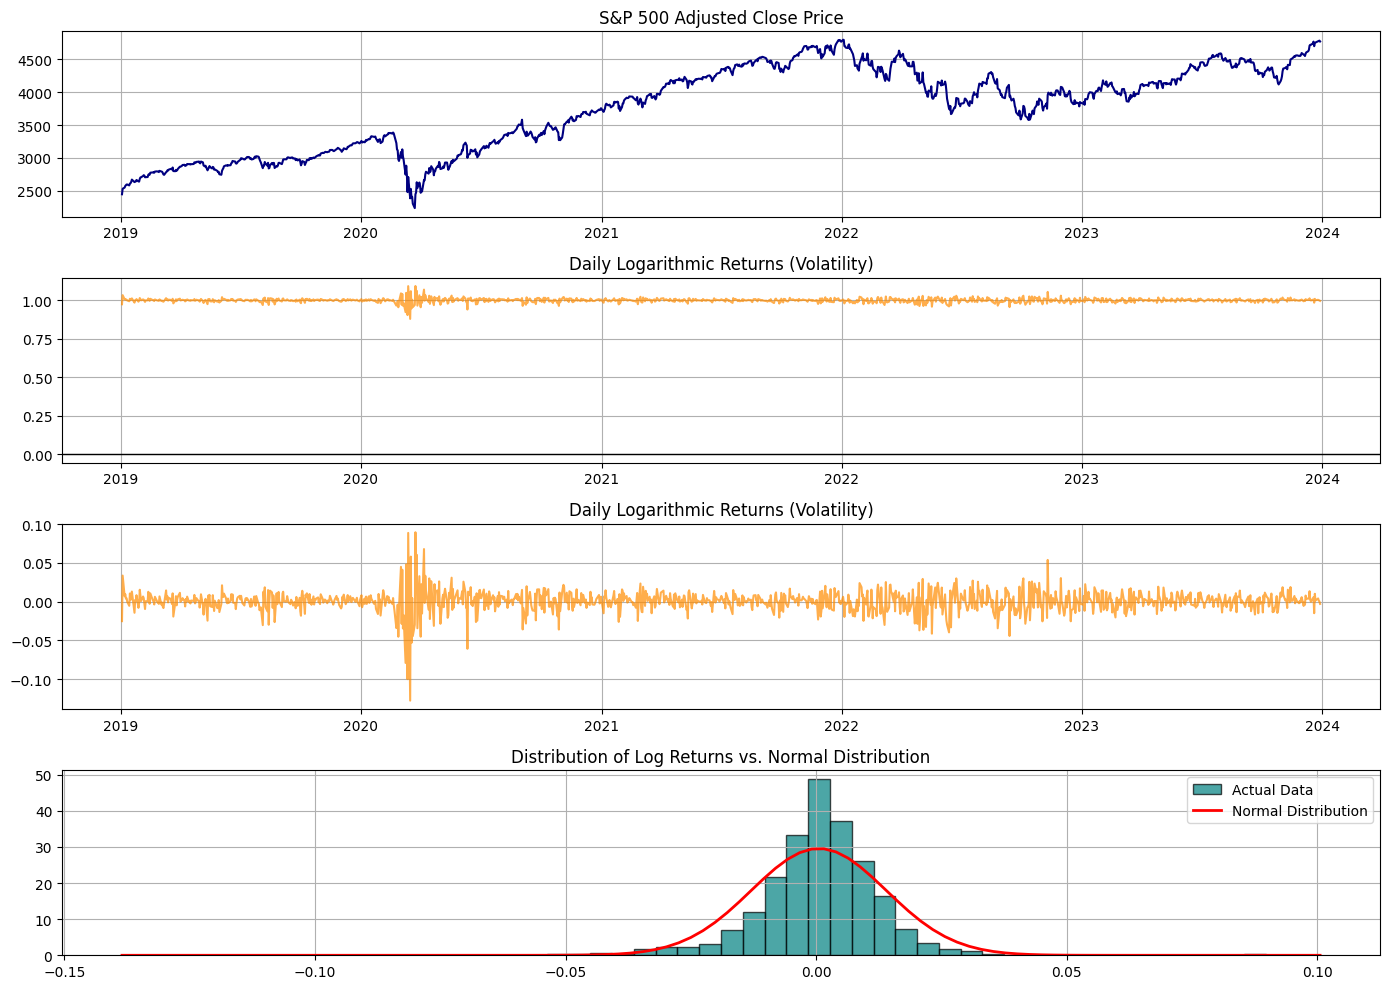

In [ ]:
# 3. Visualization
plt.figure(figsize=(14, 10))

# Subplot 1: Price History
plt.subplot(4, 1, 1)
plt.plot(df['Close'], color='navy')
plt.title('S&P 500 Adjusted Close Price')
plt.grid(True)

# Subplot 2: Log Returns (Time Series)
plt.subplot(4, 1, 2)
# plt.plot(df['Log_Return'], color='darkorange', alpha=0.7)
plt.plot(df['Return'], color='darkorange', alpha=0.7)
plt.title('Daily Logarithmic Returns (Volatility)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df['Log_Return'], color='darkorange', alpha=0.7)
# plt.plot(df['Return'], color='darkorange', alpha=0.7)
plt.title('Daily Logarithmic Returns (Volatility)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True)

# Subplot 3: Histogram of Returns (Distribution)
plt.subplot(4, 1, 4)
plt.hist(df['Log_Return'], bins=50, color='teal', edgecolor='black', alpha=0.7, density=True, label='Actual Data')

# Overlay a Normal Distribution curve for comparison
mu, std = stats.norm.fit(df['Log_Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal Distribution')

plt.title('Distribution of Log Returns vs. Normal Distribution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Statistical Summary
# print(f"--- Statistics for {ticker} ---")
# print(f"Mean Daily Log Return: {df['Log_Return'].mean():.6f}")
# print(f"Daily Volatility (Std Dev): {df['Log_Return'].std():.6f}")
# print(f"Annualized Volatility: {df['Log_Return'].std() * np.sqrt(252):.2%}")
# print(f"Skewness: {df['Log_Return'].skew():.4f}")
# print(f"Kurtosis: {df['Log_Return'].kurtosis():.4f}")

In [43]:
log_returns

Ticker,^GSPC
Date,
2019-01-03,-0.025068
2019-01-04,0.033759
2019-01-07,0.006986
2019-01-08,0.009649
2019-01-09,0.004090
...,...
2023-12-22,0.001659
2023-12-26,0.004223
2023-12-27,0.001429


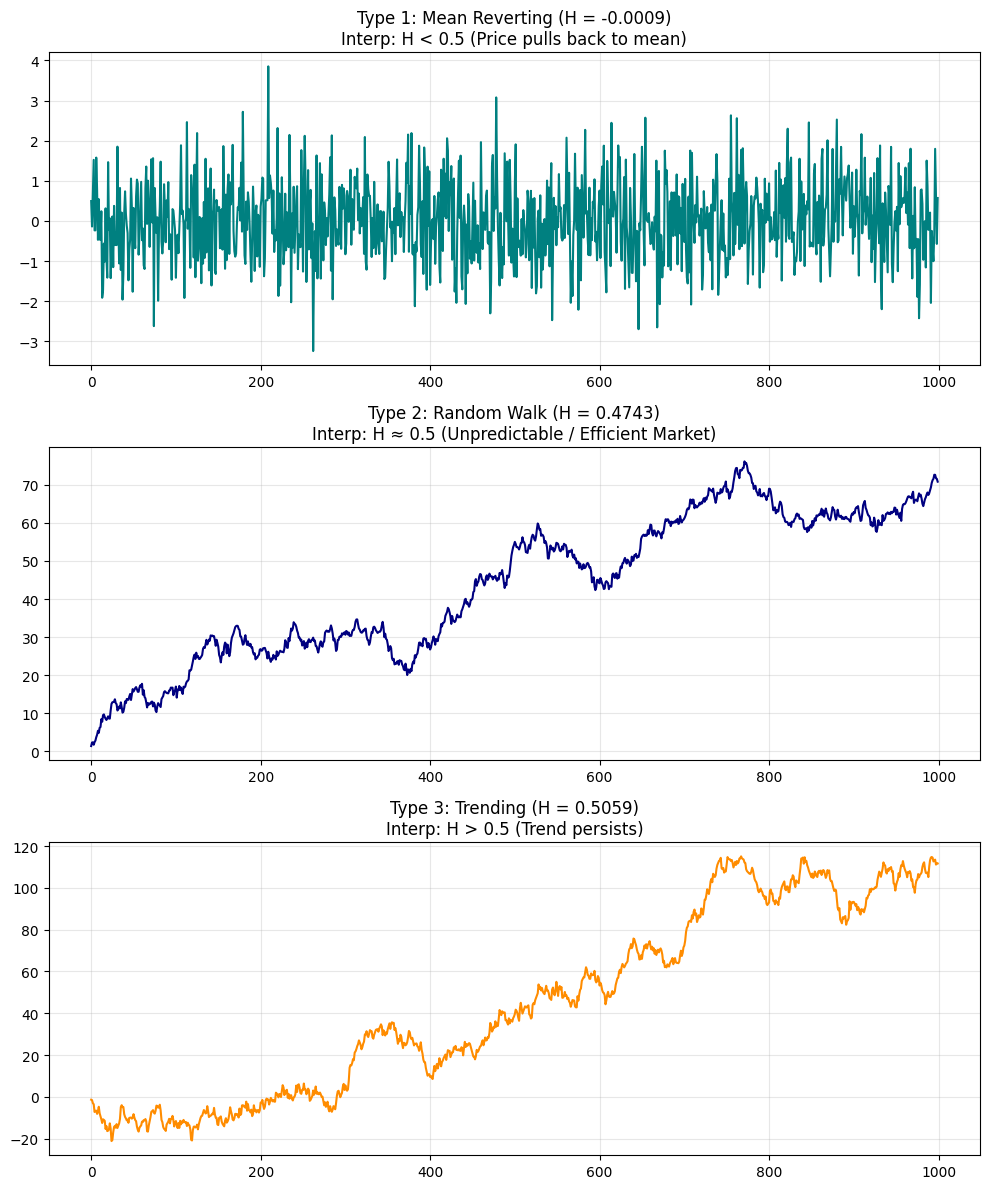


--- Analyzing Real Data: ^GSPC ---
Hurst Exponent for S&P 500: 0.3902
Interpretation: The market is currently Mean Reverting.


C:\Users\yahya\AppData\Local\Temp\ipykernel_17312\3585520595.py:70: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- 1. The Hurst Exponent Function ---
def get_hurst_exponent(time_series, max_lag=20):
    """
    Returns the Hurst Exponent of the time series vector ts.
    Calculation uses the R/S analysis method.
    """
    lags = range(2, max_lag)
    tau = [np.sqrt(np.std(np.subtract(time_series[lag:], time_series[:-lag]))) for lag in lags]
    
    # We use a polyfit to estimate the slope of the log-log plot
    # The relationship is: log(tau) = H * log(lag) + C
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    
    return poly[0] * 2.0 

# --- 2. Generate Synthetic Data for Demonstration ---
np.random.seed(42)
n_points = 1000

# A. Mean Reverting (Noise around a mean)
# Just random noise oscillates wildly around 0
mean_reverting = np.random.randn(n_points) 

# B. Random Walk (Brownian Motion)
# Cumulative sum of random noise
random_walk = np.cumsum(np.random.randn(n_points))

# C. Trending (Trend + Noise)
# A strong linear trend added to the random walk
trending = np.linspace(0, 100, n_points) + np.cumsum(np.random.randn(n_points) * 2)

# --- 3. Calculate Hurst for each ---
h_mr = get_hurst_exponent(mean_reverting)
h_rw = get_hurst_exponent(random_walk)
h_tr = get_hurst_exponent(trending)

# --- 4. Visualization ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot Mean Reverting
ax1.plot(mean_reverting, color='teal')
ax1.set_title(f"Type 1: Mean Reverting (H = {h_mr:.4f})\nInterp: H < 0.5 (Price pulls back to mean)")
ax1.grid(True, alpha=0.3)

# Plot Random Walk
ax2.plot(random_walk, color='navy')
ax2.set_title(f"Type 2: Random Walk (H = {h_rw:.4f})\nInterp: H ≈ 0.5 (Unpredictable / Efficient Market)")
ax2.grid(True, alpha=0.3)

# Plot Trending
ax3.plot(trending, color='darkorange')
ax3.set_title(f"Type 3: Trending (H = {h_tr:.4f})\nInterp: H > 0.5 (Trend persists)")
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- 5. Application to Real S&P 500 Data ---
try:
    import yfinance as yf
    
    # Download data
    ticker = '^GSPC'
    print(f"\n--- Analyzing Real Data: {ticker} ---")
    data = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)
    
    if len(data) > 0:
        prices = data['Close'].values
        
        # Note: Hurst is sensitive to lag selection. 
        # For daily financial data, larger lags (e.g., 100) often give better long-term estimates.
        real_hurst = get_hurst_exponent(prices, max_lag=100)
        
        print(f"Hurst Exponent for S&P 500: {real_hurst:.4f}")
        
        if real_hurst < 0.45:
            print("Interpretation: The market is currently Mean Reverting.")
        elif real_hurst > 0.55:
            print("Interpretation: The market is currently Trending.")
        else:
            print("Interpretation: The market is behaving like a Random Walk.")
    else:
        print("Could not download data.")

except Exception as e:
    print(f"Error fetching real data: {e}")

C:\Users\yahya\AppData\Local\Temp\ipykernel_17312\215208846.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)


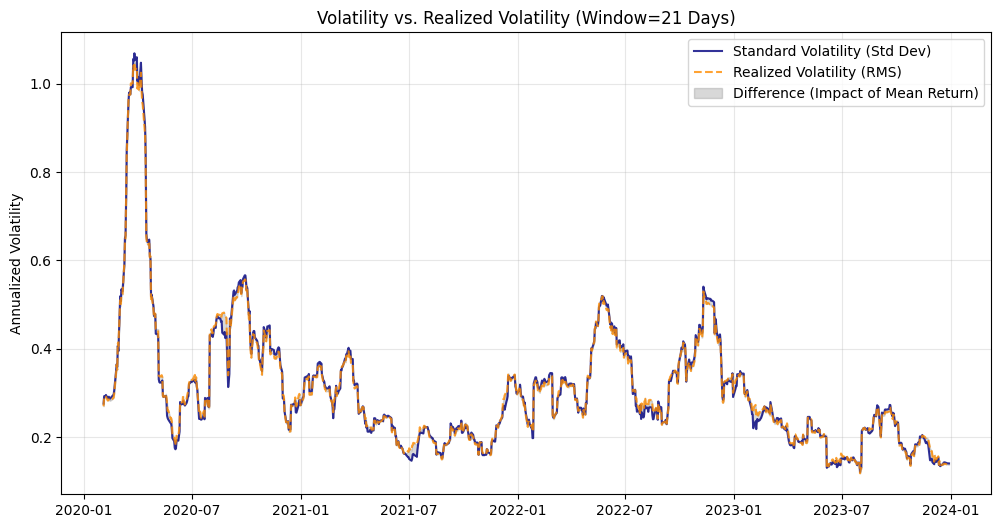

Average Absolute Difference: 0.006694
Interpretation: The values are nearly identical because daily mean returns are close to zero.


In [61]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# 1. Fetch Data
ticker = 'AAPL' # S&P 500
data = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)

# 2. Calculate Log Returns
# r_t = ln(P_t / P_{t-1})
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

# 3. Define the Window (e.g., 21 trading days = 1 month)
window = 21
trading_days_per_year = 252

# --- METRIC A: Standard Volatility (Standard Deviation) ---
# Formula: sqrt( sum(r - mean)^2 / (N-1) )
# This centers the data (subtracts the mean return of the month)
data['Vol_StdDev'] = data['Log_Return'].rolling(window).std() * np.sqrt(trading_days_per_year)

# --- METRIC B: Realized Volatility (Root Mean Square) ---
# Formula: sqrt( sum(r^2) / N )
# This assumes the mean return is ZERO.
# It is often considered a "purer" measure of risk because it penalizes non-zero returns even if they are consistent.
data['Vol_Realized'] = np.sqrt(
    (data['Log_Return'] ** 2).rolling(window).mean() 
    * trading_days_per_year
)

# 4. Visualization
plt.figure(figsize=(12, 6))

# Plot both
plt.plot(data['Vol_StdDev'], label='Standard Volatility (Std Dev)', color='navy', alpha=0.8, linewidth=1.5)
plt.plot(data['Vol_Realized'], label='Realized Volatility (RMS)', color='darkorange', linestyle='--', alpha=0.8, linewidth=1.5)

# Highlight the difference
plt.fill_between(data.index, data['Vol_StdDev'], data['Vol_Realized'], color='gray', alpha=0.3, label='Difference (Impact of Mean Return)')

plt.title(f'Volatility vs. Realized Volatility (Window={window} Days)')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Quantification of the Difference
diff = np.mean(np.abs(data['Vol_StdDev'] - data['Vol_Realized']))
print(f"Average Absolute Difference: {diff:.6f}")
print("Interpretation: The values are nearly identical because daily mean returns are close to zero.")

C:\Users\yahya\AppData\Local\Temp\ipykernel_17312\4126250192.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2024-01-01', progress=False)


--- Global Statistics (2015-2024) ---
Skewness: -0.7945 (Expected: Negative for stocks)
Kurtosis: 13.5103 (Expected: > 0 for stocks)


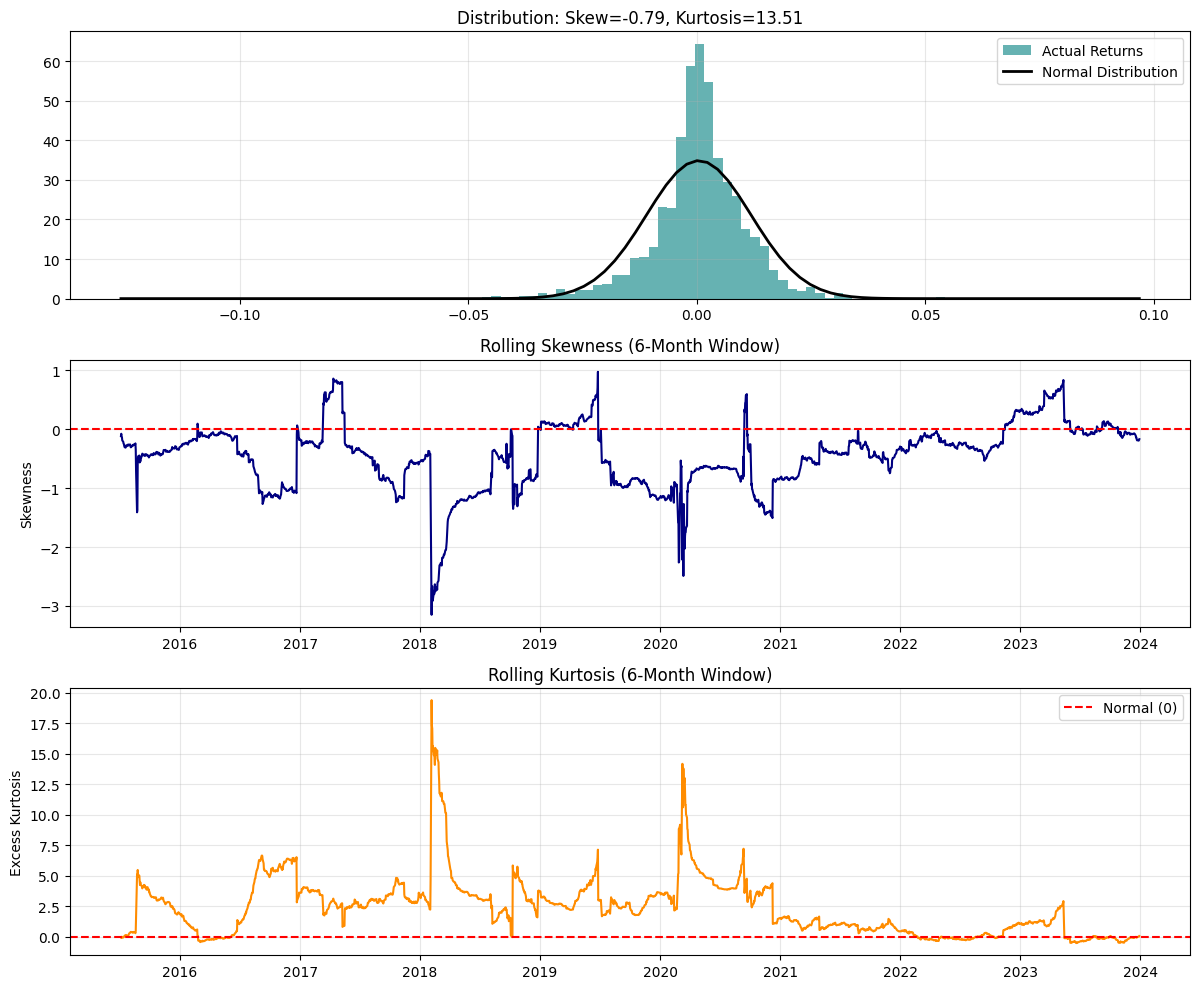

In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Fetch Data (S&P 500)
ticker = 'SPY' 
data = yf.download(ticker, start='2015-01-01', end='2024-01-01', progress=False)
data = data[['Close']].copy()

# 2. Calculate Log Returns
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

# 3. Calculate Global Statistics
# Note: Pandas calculates "Sample Skewness" and "Excess Kurtosis" (Fisher's definition, where Normal = 0) by default.
skew_val = data['Log_Return'].skew()
kurt_val = data['Log_Return'].kurtosis()

print(f"--- Global Statistics (2015-2024) ---")
print(f"Skewness: {skew_val:.4f} (Expected: Negative for stocks)")
print(f"Kurtosis: {kurt_val:.4f} (Expected: > 0 for stocks)")

# 4. Rolling Statistics (The "Risk Regime" View)
# We use a 6-month rolling window (approx 126 trading days)
window = 126
data['Roll_Skew'] = data['Log_Return'].rolling(window).skew()
data['Roll_Kurt'] = data['Log_Return'].rolling(window).kurt()

# 5. Visualization
plt.figure(figsize=(12, 10))

# Plot A: Histogram with Normal Overlay
plt.subplot(3, 1, 1)
plt.hist(data['Log_Return'], bins=100, density=True, alpha=0.6, color='teal', label='Actual Returns')

# Create Normal Curve with same Mean/Std
mu, std = stats.norm.fit(data['Log_Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title(f"Distribution: Skew={skew_val:.2f}, Kurtosis={kurt_val:.2f}")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot B: Rolling Skewness
plt.subplot(3, 1, 2)
plt.plot(data['Roll_Skew'], color='navy')
plt.axhline(0, color='red', linestyle='--')
plt.title('Rolling Skewness (6-Month Window)')
plt.ylabel('Skewness')
plt.grid(True, alpha=0.3)
# Note: When this line drops deep negative, it usually marks a crash.

# Plot C: Rolling Kurtosis
plt.subplot(3, 1, 3)
plt.plot(data['Roll_Kurt'], color='darkorange')
plt.axhline(0, color='red', linestyle='--', label='Normal (0)')
plt.title('Rolling Kurtosis (6-Month Window)')
plt.ylabel('Excess Kurtosis')
plt.legend()
plt.grid(True, alpha=0.3)
# Note: Spikes here indicate periods where "extreme things" were happening frequently.

plt.tight_layout()
plt.show()